This project is about using LIME to explain individual predictions in a Machine Learning application. Your instructor is Dr. E. Kapetanios (PhD, ETH Zurich).

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [3]:
df= pd.read_csv("winequality-red.csv")

In [4]:
print("Rows,Columns: "+str(df.shape))


Rows,Columns: (1599, 12)


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
# no missing values
# selecting only the feature variables
X_feature_names= [i for i in df.columns if df[i].dtype in [np.float]]

In [9]:
print(X_feature_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [10]:
Y=[i for i in df.columns if df[i].dtype in [np.int64]]

In [11]:
print(Y)

['quality']


In [12]:
df['quality'].unique()


array([5, 6, 7, 4, 8, 3])

In [13]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
df['goodquality']=[1 if x>=7 else 0 for x in df['quality']]

In [15]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [16]:
x=df.drop(['quality','goodquality'],axis=1)
Y=df['goodquality']

In [17]:
from sklearn.preprocessing import StandardScaler
X_features= x
X=StandardScaler().fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.30, random_state=0)

In [19]:
print(y_test.value_counts())

0    430
1     50
Name: goodquality, dtype: int64


In [20]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [21]:
model1= DecisionTreeClassifier(random_state=1)
model1.fit(X_train,y_train)
y_pred1= model1.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       430
           1       0.49      0.68      0.57        50

    accuracy                           0.89       480
   macro avg       0.72      0.80      0.75       480
weighted avg       0.91      0.89      0.90       480



In [25]:
from sklearn.ensemble import RandomForestClassifier
model2= RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)



In [26]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       430
           1       0.64      0.58      0.61        50

    accuracy                           0.92       480
   macro avg       0.80      0.77      0.78       480
weighted avg       0.92      0.92      0.92       480



In [27]:
from sklearn.ensemble import AdaBoostClassifier
model3= AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3=model2.predict(X_test)


In [28]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       430
           1       0.64      0.58      0.61        50

    accuracy                           0.92       480
   macro avg       0.80      0.77      0.78       480
weighted avg       0.92      0.92      0.92       480



In [29]:
import lime 
import lime.lime_tabular


In [40]:
explainer= lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names=X_feature_names, class_names=['goodquality'], verbose=True, mode="regression")

In [32]:
print(y_test)

1109    0
1032    0
1002    1
487     0
979     0
       ..
801     0
61      0
431     0
1210    0
713     0
Name: goodquality, Length: 480, dtype: int64


In [34]:
print(model1.predict(X_test[0:3]))

[0 0 1]


In [35]:
print(y_test[20:25])

1177    1
549     0
1341    0
1235    0
191     0
Name: goodquality, dtype: int64


In [37]:
print(model2.predict(X_test[20:25]))

[0 0 0 0 0]


In [38]:
print(model1.predict(X_test[20:25]))

[1 0 0 0 0]


In [41]:
exp=explainer.explain_instance(X_test[20],model2.predict)

Intercept 0.005648806619026315
Prediction_local [0.03528352]
Right: 0


- Generates a local explanation for the prediction of a specific instance (in this case, X_test[20]).
- The goal is to identify which features of the input data contributed most to the model's prediction for that instance.

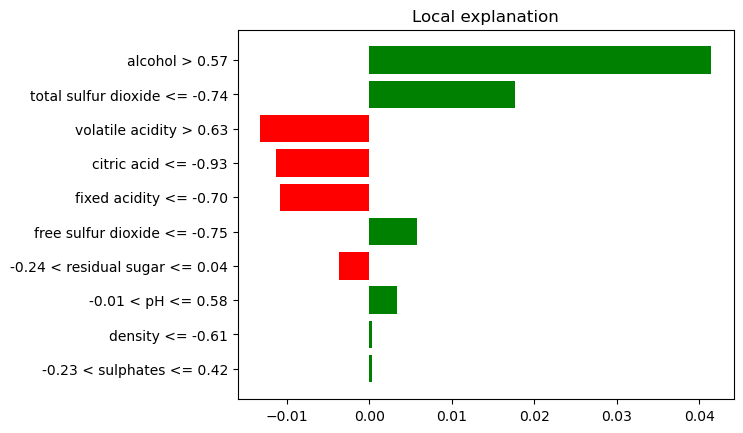

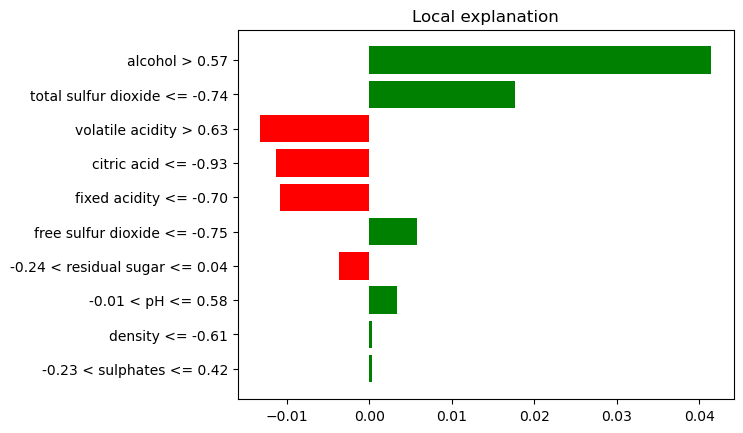

In [42]:
exp.as_pyplot_figure()